In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

base_path = ''

In [2]:
df = pd.read_csv(base_path + 'data1019.csv')

In [3]:
data = df.copy()
data

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류
0,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
1,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
2,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
3,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
4,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
...,...,...,...,...,...,...,...,...,...,...
13085615,2022-09-29,8809267390136,서라벌특란30구,1,7800,7800,9,3,두부/콩나물/계란,일반계란
13085616,2022-09-30,8809267390136,서라벌특란30구,1,7800,7800,9,4,두부/콩나물/계란,일반계란
13085617,2022-09-30,8809267390136,서라벌특란30구,1,7800,7800,9,4,두부/콩나물/계란,일반계란
13085618,2022-09-30,8809267390136,서라벌특란30구,2,7800,15600,9,4,두부/콩나물/계란,일반계란


In [4]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['SALE_QTY', 'SALE_AMT']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [7]:
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

C:\Users\min\AppData\Local\Temp\ipykernel_16100\3005184690.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


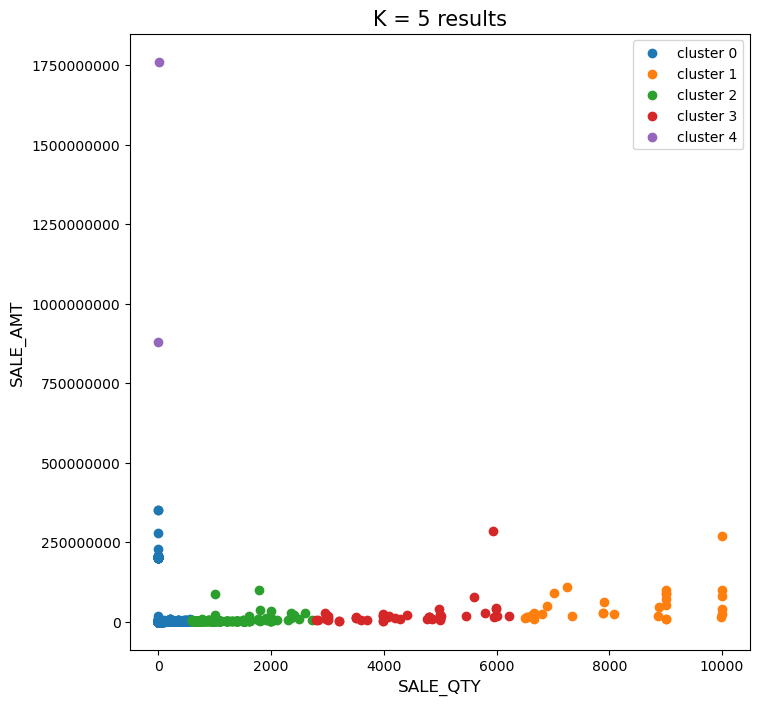

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'SALE_QTY'], df.loc[df['cluster'] == i, 'SALE_AMT'], 
                label = 'cluster ' + str(i))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('SALE_QTY', size = 12)
plt.ylabel('SALE_AMT', size = 12)
plt.show()

In [11]:
df.sort_values('SALE_QTY', ascending=False)

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류,cluster
1486199,2022-03-17,202024,딸기,9999,10000,99990000,3,3,과일,딸기,1
615753,2022-01-14,200160,백오이,9999,2480,24797520,1,4,채소,오이,1
9427107,2022-04-21,8809517210078,에그탑특란,9999,10000,79792020,4,3,두부/콩나물/계란,계란,1
4882840,2022-05-24,8801045420042,오뚜기바삭하고고소한튀김가루,9999,3900,38996100,5,1,소스/양념/조미료,조미료,1
13068571,2021-09-19,2501130000710,소금20kg,9999,27000,269973000,9,6,소스/양념/조미료,조미료,1
...,...,...,...,...,...,...,...,...,...,...,...
3526791,2021-11-27,204219,한돈앞다리살수육용,0,14500,0,11,5,돼지고기,돼지고기앞다리살,0
6353115,2022-03-27,8801115114338,서울목장저지방우유,0,3600,0,3,6,유제품,일반우유,0
7666252,2022-07-12,8801007769783,백설고소함가득참기름,0,8950,0,7,1,소스/양념/조미료,조미료,0
3526806,2021-11-29,204219,한돈앞다리살수육용,0,12000,0,11,0,돼지고기,돼지고기앞다리살,0


In [12]:
df.sort_values('SALE_PRC', ascending=False)

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류,cluster
1503183,2022-03-23,201044,딸기,2,880491120,1760982240,3,2,과일,딸기,4
530840,2021-10-18,200047,청상추1봉,1,880306000,880306000,10,0,채소,상추,4
12181523,2021-10-10,351030,국내산돈가브리살,1,351028000,351028000,10,6,정육,등심덧살,0
11986628,2022-04-11,351001,국내산돈삼겹살,1,351008000,351008000,4,0,정육,돼지고기,0
1683594,2022-04-20,2000804,천혜향,1,279002000,279002000,4,2,과일,만감류,0
...,...,...,...,...,...,...,...,...,...,...,...
1812729,2022-02-16,3074,누드애호박개,1,0,0,2,2,채소,호박,0
1512675,2022-05-07,201463,딸기,1,0,0,5,5,과일,딸기,0
676880,2022-03-13,200223,애호박,1,0,0,3,6,채소,애호박,0
1812730,2022-02-26,3074,누드애호박개,1,0,0,2,5,채소,호박,0


In [13]:
df.sort_values('SALE_AMT', ascending=False)

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류,cluster
1503183,2022-03-23,201044,딸기,2,880491120,1760982240,3,2,과일,딸기,4
530840,2021-10-18,200047,청상추1봉,1,880306000,880306000,10,0,채소,상추,4
12181523,2021-10-10,351030,국내산돈가브리살,1,351028000,351028000,10,6,정육,등심덧살,0
11986628,2022-04-11,351001,국내산돈삼겹살,1,351008000,351008000,4,0,정육,돼지고기,0
9954989,2022-08-20,8809182054694,자연담은쌀21년산햅쌀,5940,68000,285120000,8,5,양곡,쌀,3
...,...,...,...,...,...,...,...,...,...,...,...
7072916,2021-09-01,8850389106211,모구모구복숭아,0,1500,0,9,2,생수/음료/커피,과일주스,0
7072913,2021-08-31,8850389106211,모구모구복숭아,0,1500,0,8,1,생수/음료/커피,과일주스,0
7072912,2021-08-31,8850389106211,모구모구복숭아,0,1500,0,8,1,생수/음료/커피,과일주스,0
7047933,2022-06-15,8809331505657,아워홈요리두부찌개,0,1500,0,6,2,두부/콩나물/계란,두부,0


In [15]:
df.sort_values('SALE_PRC', ascending=False).head(10)

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류,cluster
1503183,2022-03-23,201044,딸기,2,880491120,1760982240,3,2,과일,딸기,4
530840,2021-10-18,200047,청상추1봉,1,880306000,880306000,10,0,채소,상추,4
12181523,2021-10-10,351030,국내산돈가브리살,1,351028000,351028000,10,6,정육,등심덧살,0
11986628,2022-04-11,351001,국내산돈삼겹살,1,351008000,351008000,4,0,정육,돼지고기,0
1683594,2022-04-20,2000804,천혜향,1,279002000,279002000,4,2,과일,만감류,0
9693429,2022-01-07,255341,생삼겹살구이용,1,255103000,229592700,1,4,정육,삼겹살,0
1644590,2021-12-18,201352,섬초,1,205356010,205356010,12,5,채소,섬초,0
2165377,2021-10-02,22002693,자두,1,205260010,205260010,10,5,과일,자두,0
1022419,2022-08-16,201344,흙당근,1,205168010,205168010,8,1,채소,당근,0
8993799,2022-05-06,201321,표고버섯국산,1,205045000,205045000,5,4,채소,표고버섯,0
